In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('weightheight_data.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


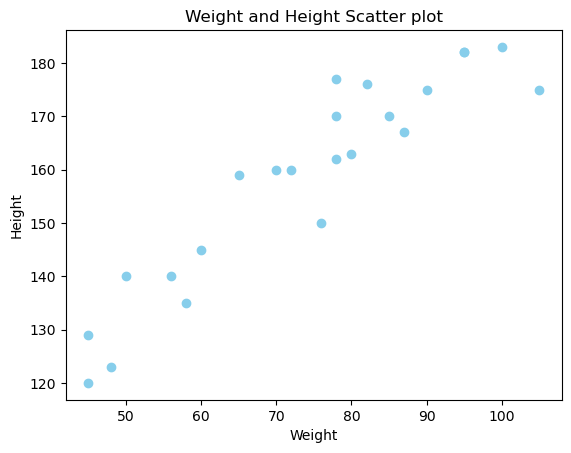

In [3]:
##Scatter plot
plt.scatter(df['Weight'] ,df['Height'], c = 'skyblue')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Weight and Height Scatter plot')
plt.show()

In [4]:
## Correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


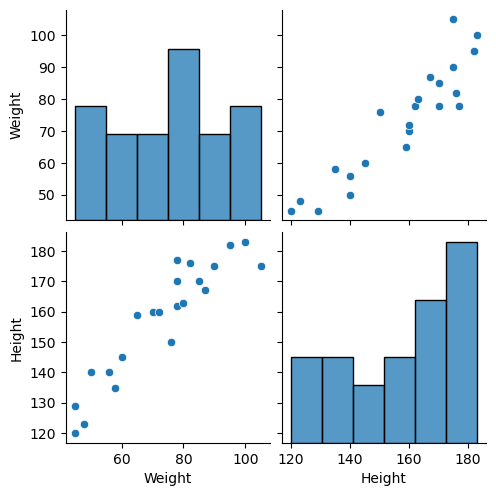

In [5]:
##f Seaborn for visualization
import seaborn as sns
sns.pairplot(data = df)
plt.show()

In [6]:
## Independent and dependent features
X = df[['Weight']] ## Independent features should be data  frame or 2D array
Y = df['Height']  ## Dependent feature need to be 1D or it can be series
print(X.shape, Y.shape)

(23, 1) (23,)


In [7]:
## Train Test split
from sklearn.model_selection  import train_test_split


In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 45 )

In [9]:
### Standardization
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
## Apply simple linear regression
from sklearn.linear_model import LinearRegression

In [12]:
regression = LinearRegression(n_jobs= -1)
regression.fit(X_train, Y_train)

LinearRegression(n_jobs=-1)

In [13]:
print("Coefficient or slope : ", regression.coef_)
print("Intercept : ", regression.intercept_)

Coefficient or slope :  [17.59928761]
Intercept :  157.23529411764707


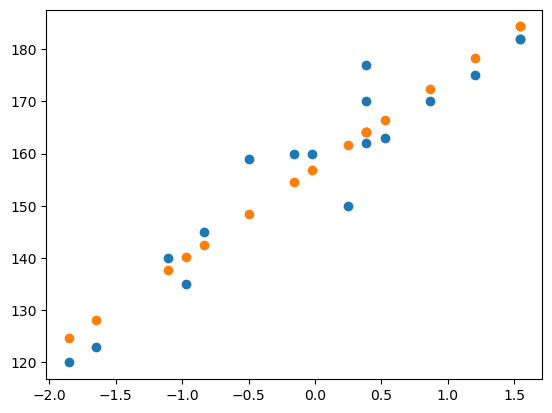

In [14]:
##  Plot Training and plot best fit line
plt.scatter(X_train, Y_train)
plt.scatter(X_train,  regression.predict(X_train))
plt.show()


In [15]:
## prediction for test data
y_pred = regression.predict(X_test)

In [16]:
y_pred

array([196.29619479, 174.79864873, 130.60924852, 190.32465422,
       124.63770795, 168.82710816])

In [17]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [18]:
mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
rmse = np.sqrt(mse)
print("MSE : ",mse)
print("MAE : ", mae)
print("RMSE : ", rmse)

MSE :  121.11059607743971
MAE :  9.557572184332983
RMSE :  11.005025946241094


In [19]:
## R-square
### coefficient of determination SSR = sum of square of residual SST = total sum of squares
from sklearn.metrics import r2_score
score = r2_score(y_pred, Y_test )
print(score)

0.8399385567301576


In [20]:
## OLS linear regression
import statsmodels.api as sn


In [21]:
model = sn.OLS(Y_train, X_train).fit()

In [22]:
prediction = model.predict(X_test)
print(prediction)

[ 39.06090067  17.56335462 -26.6260456   33.0893601  -32.59758617
  11.59181405]


In [23]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.049
Method:                 Least Squares   F-statistic:                             0.2002
Date:                Thu, 20 Mar 2025   Prob (F-statistic):                       0.661
Time:                        19:17:42   Log-Likelihood:                         -110.12
No. Observations:                  17   AIC:                                      222.2
Df Residuals:                      16   BIC:                                      223.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


In [24]:
## Prediction for new data
regression.predict(scaler.transform([[72]]))

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([156.88402703])